<a href="https://colab.research.google.com/github/cardosorrenan/alura-QuarentenaDados/blob/master/Day01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Movies fetched from api: 9742 rows

In [0]:
movies = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/introducao-a-data-science/master/aula0/ml-latest-small/movies.csv")
movies.columns = ["movie_id", "title", "genres"]

Reviews fetched from api: 100836 rows

In [0]:
reviews = pd.read_csv("https://github.com/alura-cursos/introducao-a-data-science/blob/master/aula0/ml-latest-small/ratings.csv?raw=true")
reviews.columns = ["user_id", "movie_id", "rating", "timestamp"]

Average movie reviews: 9724 rows

In [122]:
reviews_avg = reviews.groupby('movie_id')['rating'].mean()
reviews_avg.head()

movie_id
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: rating, dtype: float64

Average and film details: 9724 rows

In [123]:
movies_with_avgs = movies.join(reviews_avg, on="movie_id")
print(movies_with_avgs.shape)
movies_with_avgs.head()

(9742, 4)


,movie_id,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.920930
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.431818
2,3,Grumpier Old Men (1995),Comedy|Romance,3.259615
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.357143
4,5,Father of the Bride Part II (1995),Comedy,3.071429


## **Task 1**: Find all the movies without rating

In [124]:
movies_nan_avgs = movies_with_avgs[movies_with_avgs.isna().any(axis=1)]
print(movies_nan_avgs.shape)
movies_nan_avgs.head()

(18, 4)


,movie_id,title,genres,rating
816,1076,"Innocents, The (1961)",Drama|Horror|Thriller,NaN
2211,2939,Niagara (1953),Drama|Thriller,NaN
2499,3338,For All Mankind (1989),Documentary,NaN
2587,3456,"Color of Paradise, The (Rang-e khoda) (1999)",Drama,NaN
3118,4194,I Know Where I'm Going! (1945),Drama|Romance|War,NaN


## **Task 3**: Find the review amount for each movie

In [125]:
count = reviews.groupby('movie_id')['movie_id'].count()
movies_count_reviews = pd.DataFrame({'movie_id': count.index, 'count': count.values}).sort_values("movie_id")
movies_count_reviews.head()

,movie_id,count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49


## **Task 4**: Round the averages to 2 decimal digits


In [126]:
movies_with_avgs = movies_with_avgs.round({'rating': 2})
movies_with_avgs.head()

,movie_id,title,genres,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,3.92
1,2,Jumanji (1995),Adventure|Children|Fantasy,3.43
2,3,Grumpier Old Men (1995),Comedy|Romance,3.26
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,2.36
4,5,Father of the Bride Part II (1995),Comedy,3.07


## **Task 5, 6**: List all genres (unique) and occurrences of each gender


In [137]:
movie_genres = movies['genres'].to_numpy()
genres = '|'.join(movie_genres).split('|')
genres_unique, genres_amount = np.unique(genres, return_counts=True)
genres_pd = pd.DataFrame({'genre':genres_unique, 'amount':genres_amount}).sort_values("amount", ascending=False)
genres_pd.head()


,genre,amount
8,Drama,4361
5,Comedy,3756
17,Thriller,1894
1,Action,1828
15,Romance,1596


## **Task 7**: Plot results of tasks 5, 6


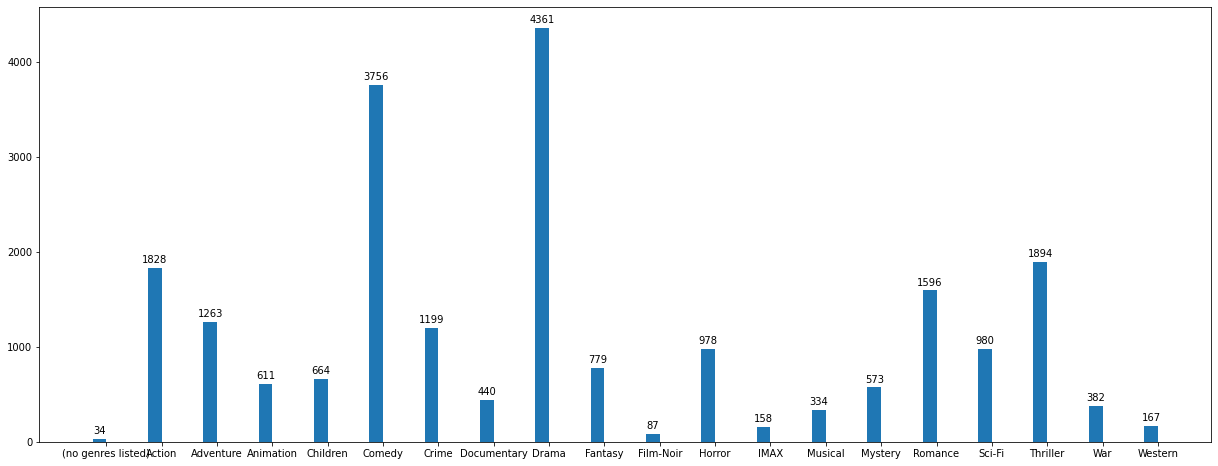

In [140]:
fig, ax = plt.subplots()
x = np.arange(len(genres_unique))
width = 0.25
genres_bar = ax.bar(x - width/2, genres_amount, width)
ax.set_xticks(x)
ax.set_xticklabels(genres_unique)


def autolabel(rects):
  for rect in rects:
    height = rect.get_height()
    ax.annotate('{}'.format(height),
                xy=(rect.get_x() + rect.get_width() / 2, height),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom')
        

autolabel(rects1)

F = plt.gcf()
Size = F.get_size_inches()
F.set_size_inches(Size[0]*3.5, Size[1]*2, forward=True) 

plt.show()

# References:
  # https://matplotlib.org/3.2.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py
  # https://stackoverflow.com/questions/332289/how-do-you-change-the-size-of-figures-drawn-with-matplotlib